In [11]:
import torch
from torchvision import transforms
import sys
sys.path.append("src/")
sys.path.append("models/vgg16")
sys.path.append("models/resnet")

from src import dataloader
from torchvision.transforms import ToTensor
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
from utils import plot
from tqdm import tqdm
from vgg16 import vgg16 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


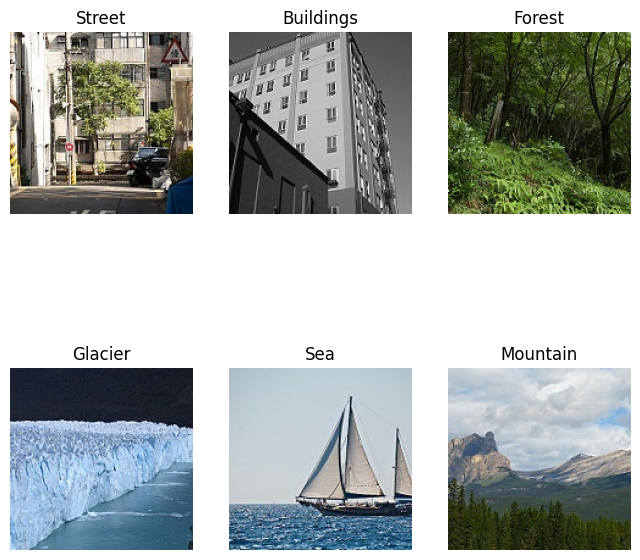

In [12]:
train_root_dir = "archive/seg_train/seg_train"
test_root_dir = "archive/seg_test/seg_test"

train_dataset = dataloader.CustomDataset(root_dir=train_root_dir).samples
test_dataset = dataloader.CustomDataset(root_dir=test_root_dir).samples
plot(train_dataset)

In [19]:
# Resize to 150x150 for Resnet, 224x224 for vgg16
batch_size = 64
shuffle = True
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 228x228
    # transforms.RandomHorizontalFlip(),  # Randomly flip images horizontally
    transforms.ToTensor(),  # Convert images to PyTorch tensors
])
train_dataset = dataloader.CustomDataset(root_dir=train_root_dir, transform=transform).samples
test_dataset = dataloader.CustomDataset(root_dir=train_root_dir, transform=transform).samples

In [20]:
pin_memory = True if torch.cuda.is_available() else False
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle, pin_memory=pin_memory)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, pin_memory=pin_memory)

In [23]:
from resnet import ResNet
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet(num_classes=6)
model = model.to(device)

In [27]:

# Define loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 10
for epoch in range(epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0
    
    # Iterate over the first 100 data points
    for i, (img, label) in enumerate(tqdm(train_loader, desc=f'Epoch {epoch + 1}')):
        if i >= 100:
            break  # Stop iterating after the 100th data point
        
        img, label = img.to(device), label.to(device)  # Move data to GPU
        optimizer.zero_grad()
        outputs = model(img)
        loss = criterion(outputs, label)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs.data, 1)
        correct_predictions += (predicted == label).sum().item()
        total_samples += label.size(0)
        running_loss += loss.item()
        
        if (i + 1) % 100 == 0:  # print every 100 mini-batches 
            print(f'[{epoch + 1}, {i + 1}] loss: {running_loss / 100:.3f}')
            running_loss = 0.0
    
    # Calculate accuracy after processing all batches for the epoch
    accuracy = correct_predictions / total_samples
    print(f'Accuracy after epoch {epoch + 1}: {accuracy * 100:.2f}%')

print('Finished Training')

Epoch 1:  45%|████▌     | 100/220 [02:53<03:28,  1.74s/it]


[1, 100] loss: 0.589
Accuracy after epoch 1: 78.53%


Epoch 2:  45%|████▌     | 100/220 [02:53<03:28,  1.74s/it]


[2, 100] loss: 0.523
Accuracy after epoch 2: 80.69%


Epoch 3:  45%|████▌     | 100/220 [02:53<03:27,  1.73s/it]


[3, 100] loss: 0.499
Accuracy after epoch 3: 81.61%


Epoch 4:  45%|████▌     | 100/220 [02:58<03:33,  1.78s/it]


[4, 100] loss: 0.492
Accuracy after epoch 4: 81.94%


Epoch 5:  45%|████▌     | 100/220 [03:03<03:40,  1.84s/it]


[5, 100] loss: 0.481
Accuracy after epoch 5: 82.83%


Epoch 6:  45%|████▌     | 100/220 [02:59<03:35,  1.79s/it]


[6, 100] loss: 0.454
Accuracy after epoch 6: 83.67%


Epoch 7:  45%|████▌     | 100/220 [02:59<03:34,  1.79s/it]


[7, 100] loss: 0.462
Accuracy after epoch 7: 83.30%


Epoch 8:  45%|████▌     | 100/220 [03:02<03:39,  1.83s/it]


[8, 100] loss: 0.450
Accuracy after epoch 8: 84.05%


Epoch 9:  45%|████▌     | 100/220 [02:58<03:33,  1.78s/it]


[9, 100] loss: 0.431
Accuracy after epoch 9: 84.38%


Epoch 10:  45%|████▌     | 100/220 [03:00<03:36,  1.80s/it]

[10, 100] loss: 0.428
Accuracy after epoch 10: 84.80%
Finished Training
